In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
num_words=10000
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

max_len = 200
x_train = pad_sequences(x_train,maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [3]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=num_words,output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [4]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5716 - loss: 0.6892 - val_accuracy: 0.6916 - val_loss: 0.6572
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7469 - loss: 0.6233 - val_accuracy: 0.8019 - val_loss: 0.5137
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8286 - loss: 0.4651 - val_accuracy: 0.8300 - val_loss: 0.3981
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8639 - loss: 0.3500 - val_accuracy: 0.8580 - val_loss: 0.3399
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8814 - loss: 0.3006 - val_accuracy: 0.8603 - val_loss: 0.3223
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8883 - loss: 0.2768 - val_accuracy: 0.8727 - val_loss: 0.3044
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9001 - loss: 0.2554 - val_accuracy: 0.8762 - val_loss: 0.2941
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9124 - loss: 0.2283 - val_accuracy: 0.8781 - v

In [5]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Accuracy: {accuracy:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8807 - loss: 0.2874
Test Accuracy: 0.88


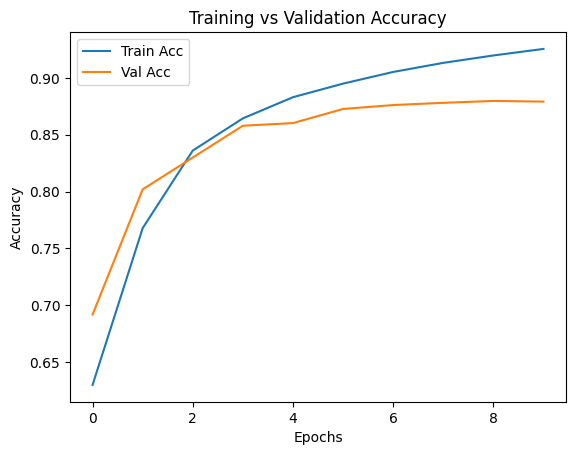

In [6]:
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

In [7]:
pred_probs = model.predict(x_test)
predictions = (pred_probs>0.5).astype("int32")

for i in range(10):
    print(f"Review {i+1}: Predicted: {predictions[i][0]} Actual: {y_test[i]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Review 1: Predicted: 0 Actual: 0
Review 2: Predicted: 1 Actual: 1
Review 3: Predicted: 1 Actual: 1
Review 4: Predicted: 0 Actual: 0
Review 5: Predicted: 1 Actual: 1
Review 6: Predicted: 1 Actual: 1
Review 7: Predicted: 1 Actual: 1
Review 8: Predicted: 0 Actual: 0
Review 9: Predicted: 1 Actual: 0
Review 10: Predicted: 1 Actual: 1


Precision: 0.88
Recall: 0.88
F1-Score: 0.88


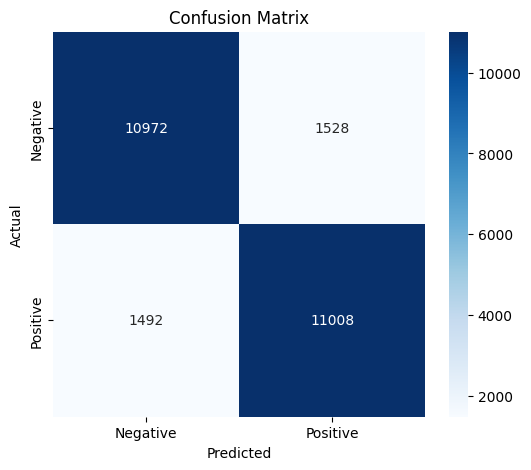

In [8]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()